### sample hw6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('dark_background')

### load data

In [2]:
co2=np.genfromtxt('co2_mlo.tsv',delimiter='\t')
time = co2[:,2]
x = time-2000
y = co2[:,4]
N=np.size(x)

### MLR by pseudoinverse

In [3]:
E=np.ones((N,5))
E[:,0]=1
E[:,1]=x
E[:,2]=x**2
E[:,3]=np.cos(2*np.pi*x)
E[:,4]=np.sin(2*np.pi*x)
avec=np.linalg.inv(E.T@E)@E.T@y

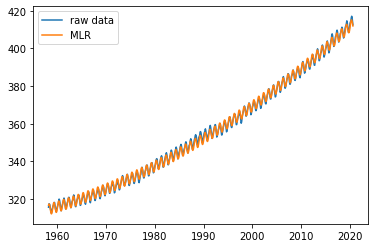

In [4]:
### plot 
yest=E@avec
plt.plot(time,y)
plt.plot(time,yest)
plt.legend(('raw data','MLR'));

In [5]:
amp=np.sqrt(avec[3]**2+avec[4]**2)
print('Amplitude of annual cycle is is '+str(amp))

Amplitude of annual cycle is is 2.8357914124400505


### Calculate Fourier coefficients

In [12]:
# --------- set the number of coeffs to calculate 
K=80
# --------
dT=1/12
T = x[N-1]-x[0]  # the length of data record
y1=y-(avec[0]+avec[1]*x+avec[2]*x**2)
A=np.zeros((K,1))
B=np.zeros((K,1))
for n in range(0,K):
    cosn=np.cos(2*np.pi*n*x/T)   # cosine function of period T/n
    sinn=np.sin(2*np.pi*n*x/T)   # sine function of period T/n
    A[n]=2/T*y1.T@cosn*dT # take the inner product to get A
    B[n]=2/T*y1.T@sinn*dT # take the inner product to get B

In [13]:
### now assemble Fourier Series

In [14]:
yest=A[0]/2*np.ones((N))
for n in range(1,K):
    cosn=np.cos(2*np.pi*n*x/T)
    sinn=np.sin(2*np.pi*n*x/T)
    yest=yest+A[n]*cosn+B[n]*sinn

### plot the results

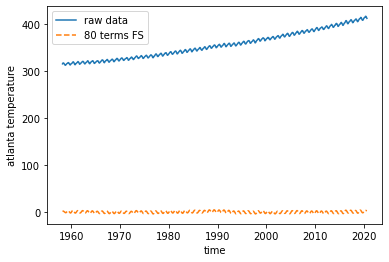

In [15]:
# plot the raw data first
plt.plot(time,y)
# overlay the Fourier Series
plt.plot(time,yest,'--')
plt.xlabel('time')
plt.ylabel('atlanta temperature')
plt.legend(('raw data',str(K)+' terms FS'));

### See the noises due to the discontinuity, "edge effect"
### This is also called "spectral leakage". to understand this, 
### let's look at the Fourier Coefficients

Text(0, 0.5, 'amplitude of Fourier coefficients')

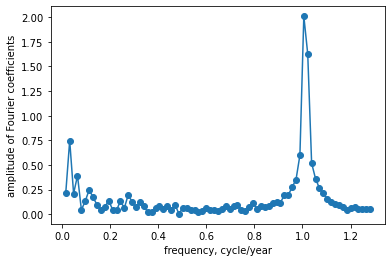

In [16]:
freq=np.linspace(1/T,K/T,K-1)
ampFS=np.sqrt(A[1:K]**2+B[1:K]**2)
plt.plot(freq,ampFS,'o-')
index=round(T)
plt.xlabel('frequency, cycle/year')
plt.ylabel('amplitude of Fourier coefficients')
#plt.axis((0.75,1.25,0,5))

### tapering function to remove discontinuity

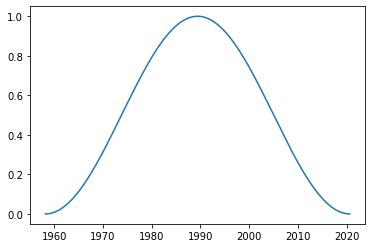

In [17]:
x0=x-x[0]
W=.5*(1-np.cos(2*np.pi*x0/T))
plt.plot(time,W)
y2=W*(y-np.mean(y)) # apply cosine tapering function

### y2 is tapered co2 data, re-calculate Fourier coefficients

In [18]:
A=np.zeros((K,1))
B=np.zeros((K,1))
for n in range(0,K):
    cosn=np.cos(2*np.pi*n*x/T)   # cosine function of period T/n
    sinn=np.sin(2*np.pi*n*x/T)   # sine function of period T/n
    A[n]=2/T*y2.T@cosn*dT # take the inner product to get A
    B[n]=2/T*y2.T@sinn*dT # take the inner product to get B

In [19]:
yest=A[0]/2*np.ones((N))
for n in range(1,K):
    cosn=np.cos(2*np.pi*n*x/T)
    sinn=np.sin(2*np.pi*n*x/T)
    yest=yest+A[n]*cosn+B[n]*sinn

(0.75, 1.25, 0.0, 5.0)

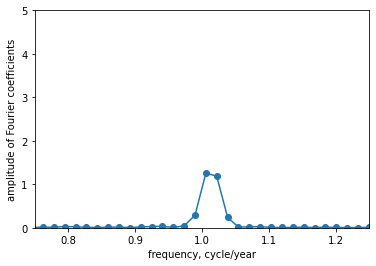

In [21]:
ampFS=np.sqrt(A[1:K]**2+B[1:K]**2)
plt.plot(freq,ampFS,'o-')
index=round(T)
plt.xlabel('frequency, cycle/year')
plt.ylabel('amplitude of Fourier coefficients')
plt.axis((0.75,1.25,0,5))